In [4]:
%matplotlib inline

In [5]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
umachine_sdss, is_complete = load_umachine_sdss_with_meert15()

In [6]:
from scipy.stats import binned_statistic

goodmask = ~np.isnan(umachine_sdss['r50_magr_kpc_meert15'])
x = umachine_sdss['sm'][goodmask]
values = umachine_sdss['r50_magr_kpc_meert15'][goodmask]
median_size_all, sm_bins_all, __  = binned_statistic(x, values, statistic='median')
sm_mids_all = 0.5*(sm_bins_all[:-1] + sm_bins_all[1:])
size_cut_all = np.interp(umachine_sdss['sm'], sm_mids_all, median_size_all)
low_size_mask_all = umachine_sdss['r50_magr_kpc_meert15'] < size_cut_all
high_size_mask_all = umachine_sdss['r50_magr_kpc_meert15'] >= size_cut_all

qmask = goodmask & (umachine_sdss['ssfr'] < -11)
x = umachine_sdss['sm'][qmask]
values = umachine_sdss['r50_magr_kpc_meert15'][qmask]
median_size_q, sm_bins_q, __ = binned_statistic(x, values, statistic='median')
sm_mids_q = 0.5*(sm_bins_q[:-1] + sm_bins_q[1:])
size_cut_q = np.interp(umachine_sdss['sm'], sm_mids_q, median_size_q)
low_size_mask_q = (umachine_sdss['r50_magr_kpc_meert15'] < size_cut_q)*(umachine_sdss['ssfr'] < -11)
high_size_mask_q = (umachine_sdss['r50_magr_kpc_meert15'] >= size_cut_q)*(umachine_sdss['ssfr'] < -11)

sfmask = goodmask & (umachine_sdss['ssfr'] < -11)
x = umachine_sdss['sm'][sfmask]
values = umachine_sdss['r50_magr_kpc_meert15'][sfmask]
median_size_sf, sm_bins_sf, __ = binned_statistic(x, values, statistic='median')
sm_mids_sf = 0.5*(sm_bins_sf[:-1] + sm_bins_sf[1:])
size_cut_sf = np.interp(umachine_sdss['sm'], sm_mids_sf, median_size_sf)
low_size_mask_sf = (umachine_sdss['r50_magr_kpc_meert15'] < size_cut_sf)*(umachine_sdss['ssfr'] >= -11)
high_size_mask_sf = (umachine_sdss['r50_magr_kpc_meert15'] >= size_cut_sf)*(umachine_sdss['ssfr'] >= -11)


In [7]:
from galsize_models.measurements.measure_sdss_clustering import get_wp_measurements, write_umachine_ascii
import os
dirname = "/Users/aphearin/work/repositories/python/galsize_models/build/lib.macosx-10.9-x86_64-2.7"

q_fname = os.path.join(dirname, 'q.dat')
sf_fname = os.path.join(dirname, 'sf.dat')

low_sizes_q_fname = os.path.join(dirname, 'low_sizes_q.dat')
low_sizes_sf_fname = os.path.join(dirname, 'low_sizes_sf.dat')
high_sizes_q_fname = os.path.join(dirname, 'high_sizes_q.dat')
high_sizes_sf_fname = os.path.join(dirname, 'high_sizes_sf.dat')

low_sizes_all_fname = os.path.join(dirname, 'low_sizes_all.dat')
high_sizes_all_fname = os.path.join(dirname, 'high_sizes_all.dat')


write_umachine_ascii(umachine_sdss[low_size_mask_q], low_sizes_q_fname, overwrite=True)
write_umachine_ascii(umachine_sdss[high_size_mask_q], high_sizes_q_fname, overwrite=True)
write_umachine_ascii(umachine_sdss[low_size_mask_sf], low_sizes_sf_fname, overwrite=True)
write_umachine_ascii(umachine_sdss[high_size_mask_sf], high_sizes_sf_fname, overwrite=True)
write_umachine_ascii(umachine_sdss[high_size_mask_all], high_sizes_all_fname, overwrite=True)
write_umachine_ascii(umachine_sdss[low_size_mask_all], low_sizes_all_fname, overwrite=True)


write_umachine_ascii(umachine_sdss[qmask], q_fname, overwrite=True)
write_umachine_ascii(umachine_sdss[sfmask], sf_fname, overwrite=True)


In [36]:
sm_low, sm_high, npts = 10, 12, 20

In [37]:
low_size_q_results = get_wp_measurements(low_sizes_q_fname, sm_low, sm_high, npts)
rp_low_size_q, wp_low_size_q, wperr_low_size_q = low_size_q_results[:, 0], low_size_q_results[:, 1], low_size_q_results[:, 2]

low_size_sf_results = get_wp_measurements(low_sizes_sf_fname, sm_low, sm_high, npts)
rp_low_size_sf, wp_low_size_sf, wperr_low_size_sf = low_size_sf_results[:, 0], low_size_sf_results[:, 1], low_size_sf_results[:, 2]

In [38]:
high_size_q_results = get_wp_measurements(high_sizes_q_fname, sm_low, sm_high, npts)
rp_high_size_q, wp_high_size_q, wperr_high_size_q = high_size_q_results[:, 0], high_size_q_results[:, 1], high_size_q_results[:, 2]

high_size_sf_results = get_wp_measurements(high_sizes_sf_fname, sm_low, sm_high, npts)
rp_high_size_sf, wp_high_size_sf, wperr_high_size_sf = high_size_sf_results[:, 0], high_size_sf_results[:, 1], high_size_sf_results[:, 2]

In [39]:
q_results = get_wp_measurements(q_fname, sm_low, sm_high, npts)
rp_q, wp_q, wperr_q = q_results[:, 0], q_results[:, 1], q_results[:, 2]

sf_results = get_wp_measurements(sf_fname, sm_low, sm_high, npts)
rp_sf, wp_sf, wperr_sf = sf_results[:, 0], sf_results[:, 1], sf_results[:, 2]


In [ ]:
low_size_all_results = get_wp_measurements(low_sizes_all_fname, sm_low, sm_high, npts)
rp_low_size_all, wp_low_size_all, wperr_low_size_all = low_size_all_results[:, 0], low_size_all_results[:, 1], low_size_all_results[:, 2]

high_size_all_results = get_wp_measurements(high_sizes_all_fname, sm_low, sm_high, npts)
rp_high_size_all, wp_high_size_all, wperr_high_size_all = high_size_all_results[:, 0], high_size_all_results[:, 1], high_size_all_results[:, 2]


In [40]:
np.save('sdss_fracdiff_sf_10p0', fracdiff_sf)


In [46]:
np.save('sdss_rp_sf', rp_sf)

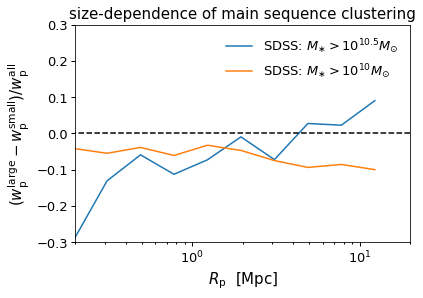

In [45]:
wp_low_size_q_interp = np.interp(rp_q, rp_low_size_q, wp_low_size_q)
wp_low_size_sf_interp = np.interp(rp_sf, rp_low_size_sf, wp_low_size_sf)
wp_high_size_q_interp = np.interp(rp_q, rp_high_size_q, wp_high_size_q)
wp_high_size_sf_interp = np.interp(rp_sf, rp_high_size_sf, wp_high_size_sf)

fracdiff_q = (wp_high_size_q_interp - wp_low_size_q_interp)/wp_q
fracdiff_sf = (wp_high_size_sf_interp - wp_low_size_sf_interp)/wp_sf

# np.save('fracdiff_sf_9p75', fracdiff_sf)

fracdiff_sf_10p0 = np.load('sdss_fracdiff_sf_10p0.npy')
fracdiff_sf_10p5 = np.load('sdss_fracdiff_sf_10p5.npy')

fig, ax = plt.subplots(1, 1)

xscale = ax.set_xscale('log')

# __=ax.plot(rp_q, fracdiff_q, color='red')
__=ax.plot(rp_sf[5:], fracdiff_sf_10p5[5:], label=r'SDSS: $M_{\ast} > 10^{10.5}M_{\odot}$')
__=ax.plot(rp_sf[5:], fracdiff_sf_10p0[5:], label=r'SDSS: $M_{\ast} > 10^{10}M_{\odot}$')

__=ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='k')

xlim = ax.set_xlim(0.2, 20)
ylim = ax.set_ylim(-0.3, 0.3)

xlabel = ax.set_xlabel(r'$R_{\rm p}$  [Mpc]')
ylabel = ax.set_ylabel(r'$(w_{\rm p}^{\rm large} - w_{\rm p}^{\rm small})/w_{\rm p}^{\rm all}$')
title = ax.set_title('size-dependence of main sequence clustering')
legend = ax.legend()

# fig.savefig('size_dependence_sf_clustering_SDSS.png', 
#             bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rp_low_size_q, wp_low_size_q, color='red')
__=ax.plot(rp_high_size_q, wp_high_size_q, '--', color='red')

__=ax.plot(rp_low_size_sf, wp_low_size_sf, color='blue')
__=ax.plot(rp_high_size_sf, wp_high_size_sf, '--', color='blue')

xlim = ax.set_xlim(0.1, 20)
